<a href="https://colab.research.google.com/github/saral7/CLIP-Zero-shot-semantic-segmentation/blob/main/Cityscapes_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install open_clip_torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
  

In [ ]:
!pip install timm

In [ ]:
root = "/content/drive/My Drive/Colab Notebooks/CLIP_photos"

In [ ]:
import open_clip
from open_clip import timm_model

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
print(timm_model)

<module 'open_clip.timm_model' from '/usr/local/lib/python3.11/dist-packages/open_clip/timm_model.py'>


In [ ]:
from __future__ import print_function, absolute_import, division
from collections import namedtuple


# --------------------------------------------------------------------------------
# Definitions
# --------------------------------------------------------------------------------

# a label and all meta information
Label = namedtuple(
    "Label",
    [
        "name",  # The identifier of this label, e.g. 'car', 'person', ... .
        # We use them to uniquely name a class
        "id",  # An integer ID that is associated with this label.
        # The IDs are used to represent the label in ground truth images
        # An ID of -1 means that this label does not have an ID and thus
        # is ignored when creating ground truth images (e.g. license plate).
        # Do not modify these IDs, since exactly these IDs are expected by the
        # evaluation server.
        "trainId",  # Feel free to modify these IDs as suitable for your method. Then create
        # ground truth images with train IDs, using the tools provided in the
        # 'preparation' folder. However, make sure to validate or submit results
        # to our evaluation server using the regular IDs above!
        # For trainIds, multiple labels might have the same ID. Then, these labels
        # are mapped to the same class in the ground truth images. For the inverse
        # mapping, we use the label that is defined first in the list below.
        # For example, mapping all void-type classes to the same ID in training,
        # might make sense for some approaches.
        # Max value is 255!
        "category",  # The name of the category that this label belongs to
        "categoryId",  # The ID of this category. Used to create ground truth images
        # on category level.
        "hasInstances",  # Whether this label distinguishes between single instances or not
        "ignoreInEval",  # Whether pixels having this class as ground truth label are ignored
        # during evaluations or not
        "color",  # The color of this label
    ],
)


# --------------------------------------------------------------------------------
# A list of all labels
# --------------------------------------------------------------------------------

# Please adapt the train IDs as appropriate for your approach.
# Note that you might want to ignore labels with ID 255 during training.
# Further note that the current train IDs are only a suggestion. You can use whatever you like.
# Make sure to provide your results using the original IDs and not the training IDs.
# Note that many IDs are ignored in evaluation and thus you never need to predict these!

labels = [
    #       name                     id    trainId   category            catId     hasInstances   ignoreInEval   color
    Label("unlabeled", 0, 255, "void", 0, False, True, (0, 0, 0)),
    Label("ego vehicle", 1, 255, "void", 0, False, True, (0, 0, 0)),
    Label("rectification border", 2, 255, "void", 0, False, True, (0, 0, 0)),
    Label("out of roi", 3, 255, "void", 0, False, True, (0, 0, 0)),
    Label("static", 4, 255, "void", 0, False, True, (0, 0, 0)),
    Label("dynamic", 5, 255, "void", 0, False, True, (111, 74, 0)),
    Label("ground", 6, 255, "void", 0, False, True, (81, 0, 81)),
    Label("road", 7, 0, "flat", 1, False, False, (128, 64, 128)),
    Label("sidewalk", 8, 1, "flat", 1, False, False, (244, 35, 232)),
    Label("parking", 9, 255, "flat", 1, False, True, (250, 170, 160)),
    Label("rail track", 10, 255, "flat", 1, False, True, (230, 150, 140)),
    Label("building", 11, 2, "construction", 2, False, False, (70, 70, 70)),
    Label("wall", 12, 3, "construction", 2, False, False, (102, 102, 156)),
    Label("fence", 13, 4, "construction", 2, False, False, (190, 153, 153)),
    Label("guard rail", 14, 255, "construction", 2, False, True, (180, 165, 180)),
    Label("bridge", 15, 255, "construction", 2, False, True, (150, 100, 100)),
    Label("tunnel", 16, 255, "construction", 2, False, True, (150, 120, 90)),
    Label("pole", 17, 5, "object", 3, False, False, (153, 153, 153)),
    Label("polegroup", 18, 255, "object", 3, False, True, (153, 153, 153)),
    Label("traffic light", 19, 6, "object", 3, False, False, (250, 170, 30)),
    Label("traffic sign", 20, 7, "object", 3, False, False, (220, 220, 0)),
    Label("vegetation", 21, 8, "nature", 4, False, False, (107, 142, 35)),
    Label("terrain", 22, 9, "nature", 4, False, False, (152, 251, 152)),
    Label("sky", 23, 10, "sky", 5, False, False, (70, 130, 180)),
    Label("person", 24, 11, "human", 6, True, False, (220, 20, 60)),
    Label("rider", 25, 12, "human", 6, True, False, (255, 0, 0)),
    Label("car", 26, 13, "vehicle", 7, True, False, (0, 0, 142)),
    Label("truck", 27, 14, "vehicle", 7, True, False, (0, 0, 70)),
    Label("bus", 28, 15, "vehicle", 7, True, False, (0, 60, 100)),
    Label("caravan", 29, 255, "vehicle", 7, True, True, (0, 0, 90)),
    Label("trailer", 30, 255, "vehicle", 7, True, True, (0, 0, 110)),
    Label("train", 31, 16, "vehicle", 7, True, False, (0, 80, 100)),
    Label("motorcycle", 32, 17, "vehicle", 7, True, False, (0, 0, 230)),
    Label("bicycle", 33, 18, "vehicle", 7, True, False, (119, 11, 32)),
    Label("license plate", 34, 255, "vehicle", 7, False, True, (0, 0, 142)),
]


# --------------------------------------------------------------------------------
# Create dictionaries for a fast lookup
# --------------------------------------------------------------------------------

# Please refer to the main method below for example usages!

# name to label object
name2label = {label.name: label for label in labels}
# id to label object
id2label = {label.id: label for label in labels}
# trainId to label object
trainId2label = {label.trainId: label for label in reversed(labels)}
# category to list of label objects
category2labels = {}
for label in labels:
    category = label.category
    if category in category2labels:
        category2labels[category].append(label)
    else:
        category2labels[category] = [label]


In [ ]:
import logging
from collections import OrderedDict

import torch
import torch.nn as nn
import numpy as np

try:
    import timm

    """ try: """
    # new timm imports >= 0.8.1
    from timm.layers import RotAttentionPool2d
    from timm.layers import AttentionPool2d as AbsAttentionPool2d
    from timm.layers import Mlp, to_2tuple

    """ except ImportError as e:
        # fallback, try old timm imports < 0.8.1
        from timm.models.layers.attention_pool2d import RotAttentionPool2d
        from timm.models.layers.attention_pool2d import AttentionPool2d as AbsAttentionPool2d
        from timm.models.layers import Mlp, to_2tuple """
except ImportError:
    timm = None

def init(
        self,
        model_name,
        embed_dim,
        image_size=224,
        pool="avg",
        proj="linear",
        proj_bias=False,
        drop=0.0,
        drop_path=None,
        patch_drop=None,
        pretrained=False,
    ):
        nn.Module.__init__(self)
        if timm is None:
            raise RuntimeError("Please `pip install timm` to use timm models.")
        self.image_size = to_2tuple(image_size)

        # setup kwargs that may not be common across all models
        timm_kwargs = {}
        if drop_path is not None:
            timm_kwargs["drop_path_rate"] = drop_path
        if patch_drop is not None:
            timm_kwargs["patch_drop_rate"] = patch_drop

        custom_pool = pool in ("abs_attn", "rot_attn")
        if proj:
            assert proj in ("linear", "mlp", "none")
        extra_proj = proj in ("linear", "mlp")
        if not extra_proj and not custom_pool:
            # use network classifier head as projection if no proj specified and no custom pooling used
            # if projection is explicitly set to "none" will be pass through from network trunk
            proj_dim = 0 if proj == "none" else embed_dim
            self.trunk = timm.create_model(
                model_name,
                num_classes=proj_dim,
                global_pool=pool,
                pretrained=pretrained,
                **timm_kwargs,
            )
            prev_chs = embed_dim
        else:
            print("kreiram tim")
            timm_kwargs["global_pool"] = ""  # ADDED
            self.trunk = timm.create_model(
                model_name,
                pretrained=pretrained,
                **timm_kwargs,
            )
            feat_size = self.trunk.default_cfg.get("pool_size", None)
            feature_ndim = 1 if not feat_size else 2
            if custom_pool:
                assert feature_ndim == 2
                # if attn pooling used, remove both classifier and default pool
                self.trunk.reset_classifier(0, global_pool="")
            else:
                # reset global pool if pool config set, otherwise leave as network default
                reset_kwargs = dict(global_pool=pool) if pool else {}
                self.trunk.reset_classifier(0, **reset_kwargs)
            prev_chs = self.trunk.num_features

        head_layers = OrderedDict()

        # Add custom pooling to head
        if pool == "abs_attn":
            head_layers["pool"] = AbsAttentionPool2d(
                prev_chs, feat_size=feat_size, out_features=embed_dim
            )
            prev_chs = embed_dim
        elif pool == "rot_attn":
            head_layers["pool"] = RotAttentionPool2d(prev_chs, out_features=embed_dim)
            prev_chs = embed_dim

        # NOTE attention pool ends with a projection layer, so proj should usually be set to '' if such pooling is used
        if proj == "linear":
            head_layers["drop"] = nn.Dropout(drop)
            head_layers["proj"] = nn.Linear(prev_chs, embed_dim, bias=proj_bias)
        elif proj == "mlp":
            head_layers["mlp"] = Mlp(
                prev_chs,
                2 * embed_dim,
                embed_dim,
                drop=(drop, 0),
                bias=(True, proj_bias),
            )

        self.head = nn.Sequential(head_layers)


In [ ]:
# Promijenjena forward funkcija
def myForward(self, x):
    x = self.trunk(x)
    x = torch.permute(x, (0, 2, 3, 1))[0]
    x = self.head(x)
    x = x.unsqueeze(0)
    x = torch.permute(x, (0, 3, 1, 2))

    return x

In [ ]:
timm_model.TimmModel.forward = myForward
timm_model.TimmModel.__init__ = init

In [ ]:
import open_clip
import os
from PIL import Image
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage, transforms

In [ ]:
class CityScapesDataset:
    def __init__(self, image_dir):
        self.image_dir = image_dir

        self.images = os.listdir(image_dir)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image_path = os.path.join(self.image_dir, self.images[index])
        ''' mask_path = os.path.join(
            self.mask_dir,
            self.images[index].replace("_leftImg8bit.png", "_gtFine_labelTrainIds.png"),
        ) '''
        image = Image.open(image_path)
        #mask = Image.open(mask_path)
        # print(np.unique(mask))
        return image #, mask


dataset = CityScapesDataset(root+"/frankfurt")

In [ ]:
modelName = "convnext_base_w_320"
pretraining = "laion_aesthetic_s13b_b82k_augreg"
model, _, preprocess = open_clip.create_model_and_transforms(
    model_name=modelName, pretrained=pretraining
)
model.to(device)
model.eval()
tokenizer = open_clip.get_tokenizer(modelName)

kreiram tim


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


open_clip_model.safetensors:   0%|          | 0.00/718M [00:00<?, ?B/s]

In [ ]:
index = 38
image = dataset[index]
imageName = dataset.images[index]
originalImage = image

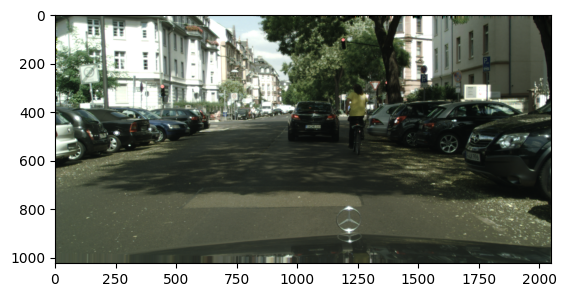

In [ ]:
plt.imshow(originalImage)

In [ ]:
usedLabels = []
[usedLabels.append(label) for label in labels if label[2] != 255]
'''for i in range(len(usedLabels)):
    print("LABEL", trainId2label[i]) '''
text_labels = ["A photo of a " + label[0] for label in usedLabels]
#text_labels = [label[0] for label in usedLabels]
colors = [name2label[labelName[13:]].color for labelName in text_labels]
#colors = [name2label[labelName].color for labelName in text_labels]
cMap = ListedColormap(colors)

In [ ]:
def myPreprocess(image):
    transform = transforms.Compose([transforms.PILToTensor()])

    # print(np.shape(image))
    image = transform(image).to(device)
    image = torch.unsqueeze(image, 0).float().to(device)

    mean, std = torch.mean(image), torch.std(image)
    # print(mean, std)
    image = (image - mean) / std
    image.to(device)
    return image

In [ ]:
text = tokenizer(text_labels).to(device)

In [ ]:
prediction = []
def doSegmentation (index):
    image = dataset[index]
    imageName = dataset.images[index]
    originalImage = image

    image = myPreprocess(image)

    with torch.no_grad(): #, torch.amp.autocast(device):
        # print("model 2", model)
        # print("model encode", model.encode_image)
        image_features = model.encode_image(image).to(device)

        image_features = torch.nn.functional.interpolate(image_features, size=(1024, 2048), mode="bilinear").to(device)
        text_features = model.encode_text(text).to(device)
        image_features /= image_features.norm(dim=-1, keepdim=True)
        text_features /= text_features.norm(dim=-1, keepdim=True)

        H = 1024
        W = 2048

        image_features = torch.permute(image_features, (0, 2, 3, 1))[0]

        result = torch.matmul(image_features, text_features.T).to(device)
        result_softmax = torch.softmax(result, dim=-1).to(device)
        segments = torch.argmax(result_softmax, dim=-1).cpu()

        ''' categories = Image.fromarray(np.array(segments, dtype=np.int32))
        categories.save(root+"/predictions_lindau_onlylabel/" + imageName)
        '''
        coloredImage = np.array(
            [[trainId2label[int(pixelId)].color for pixelId in row] for row in segments],
            dtype=np.int32,
        )

        coloredImage = np.squeeze(coloredImage)
        coloredImage = coloredImage.astype(np.uint8)
        prediction = Image.fromarray(coloredImage)
        # plt.imshow(prediction)
        prediction.save(root+ "/predictions_colors/" + imageName)

        plt.figure(figsize = (80,7))
        plt.subplot(2, 1, 1).imshow(originalImage)
        plt.subplot(2, 1, 2).imshow(prediction)


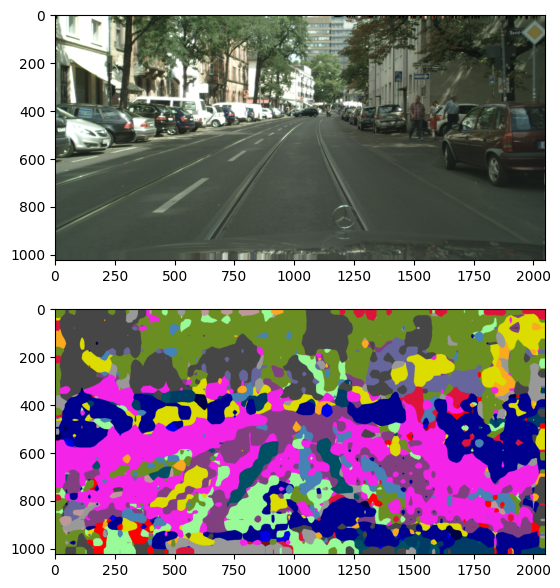

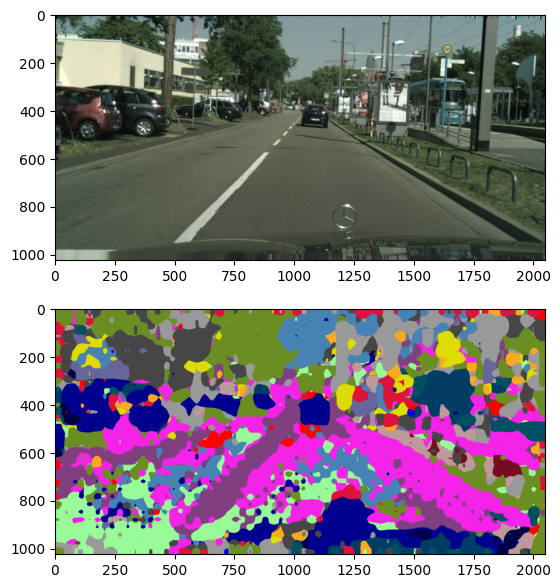

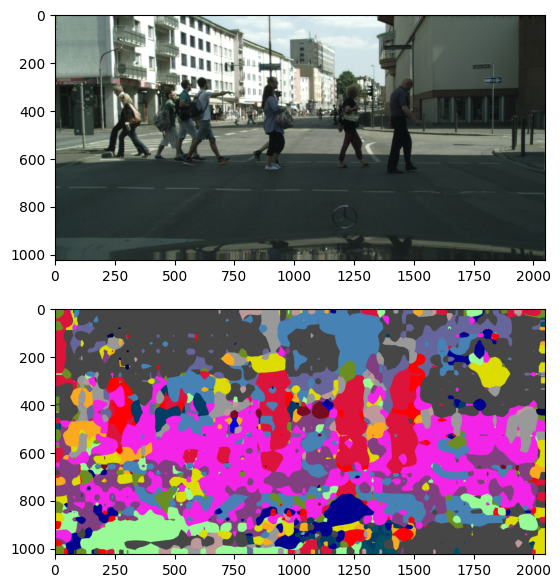

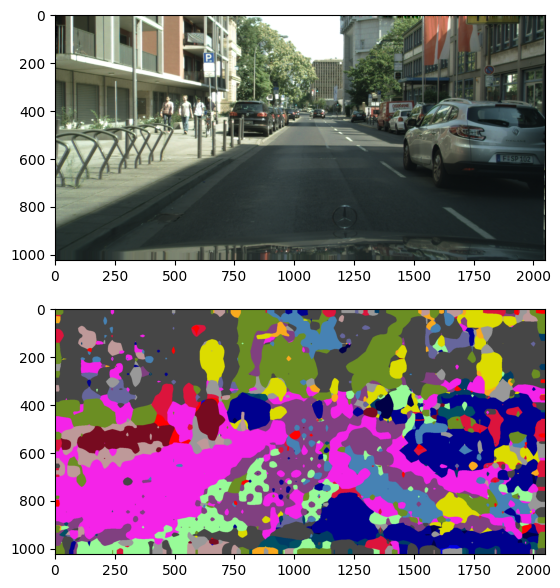

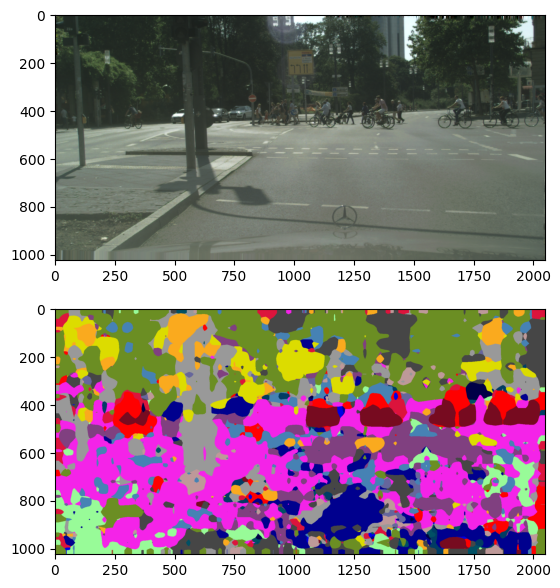

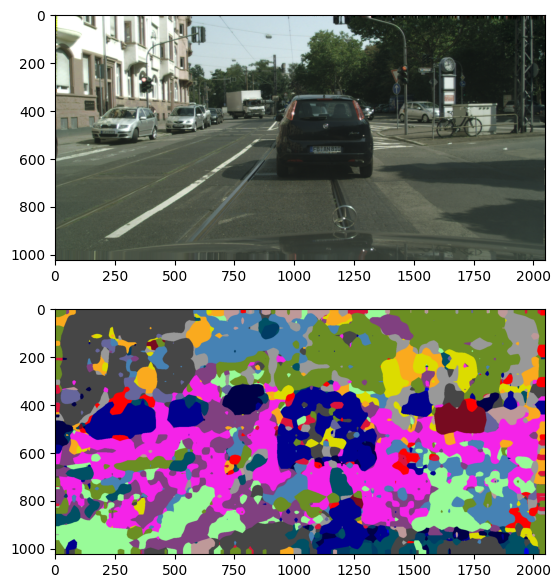

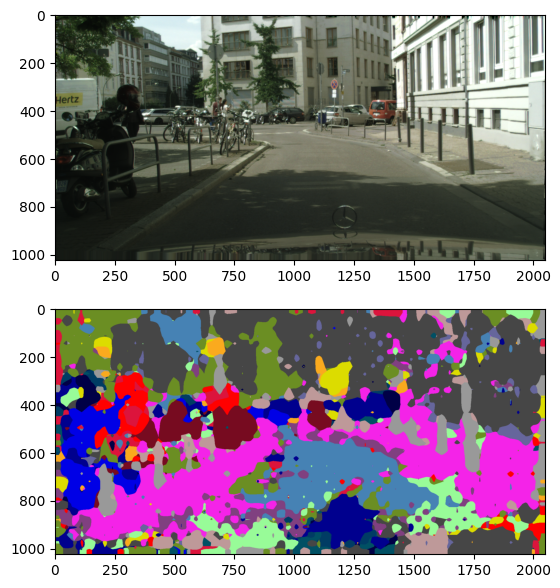

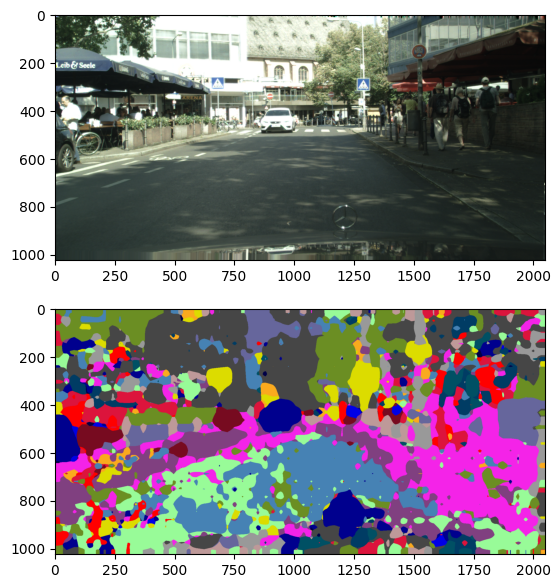

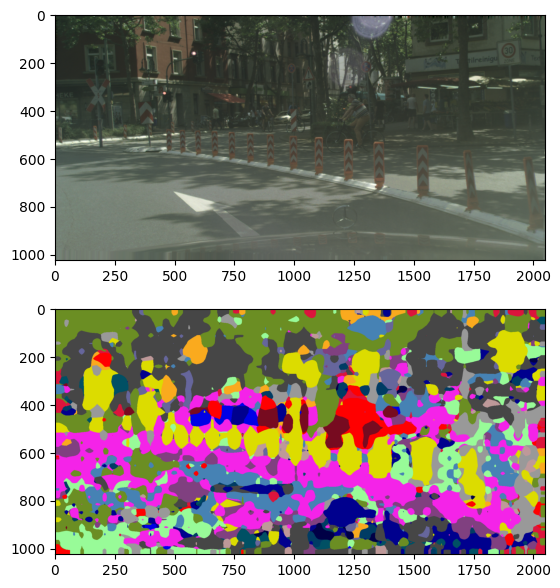

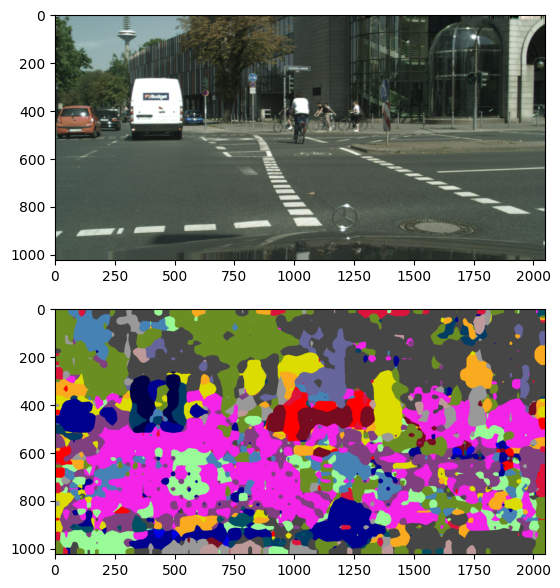

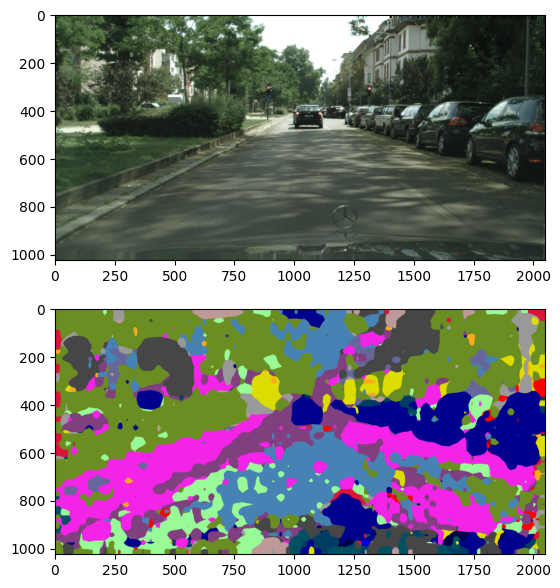

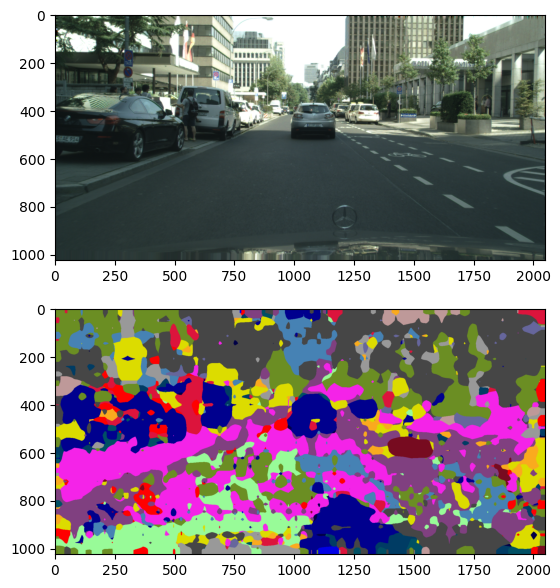

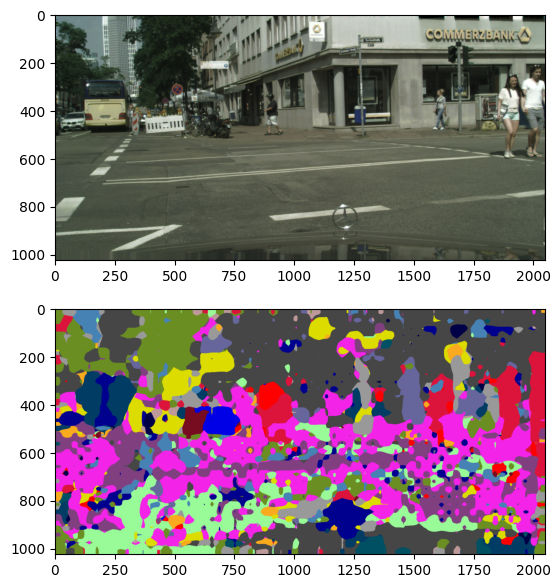

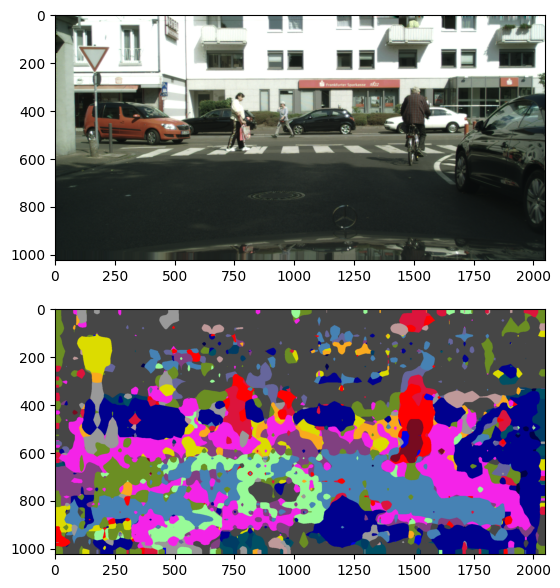

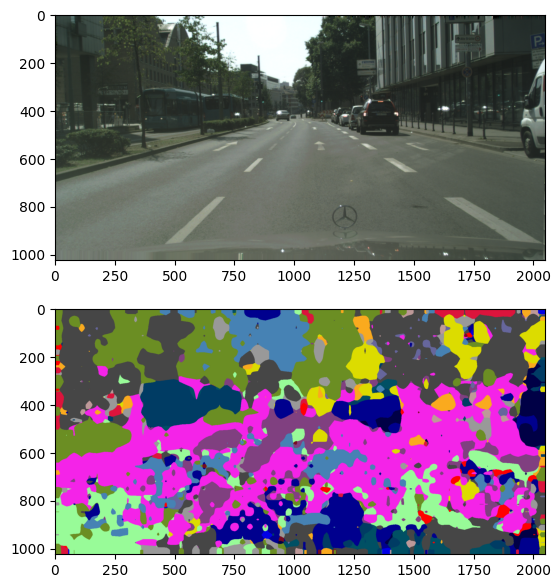

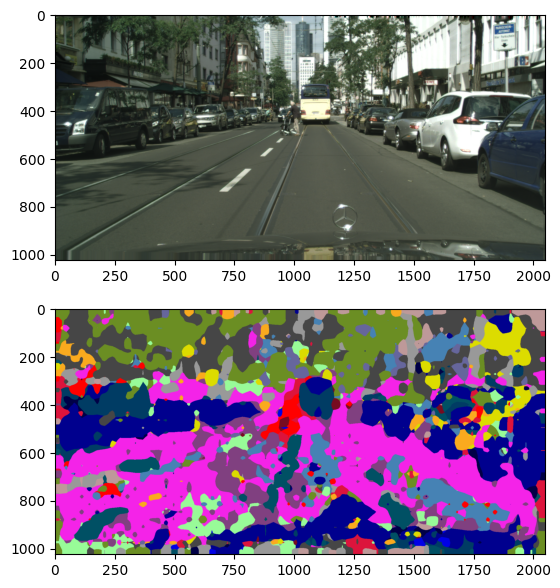

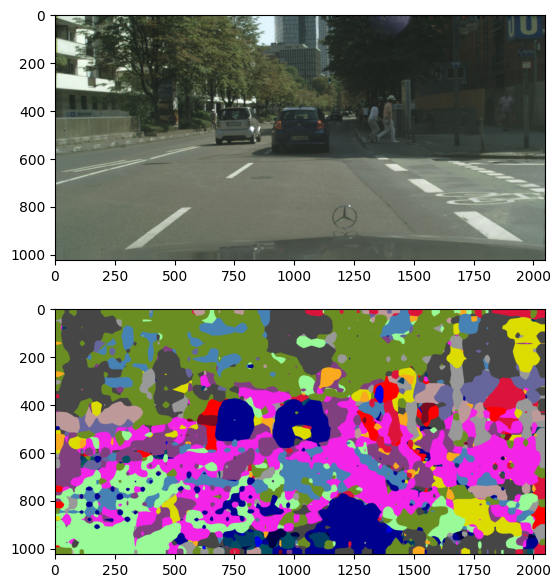

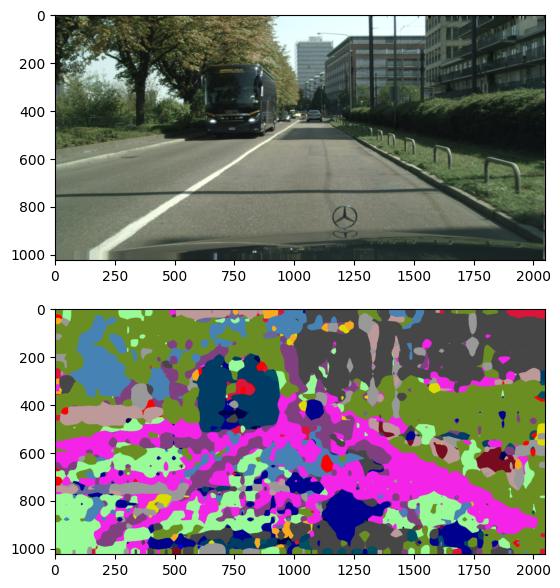

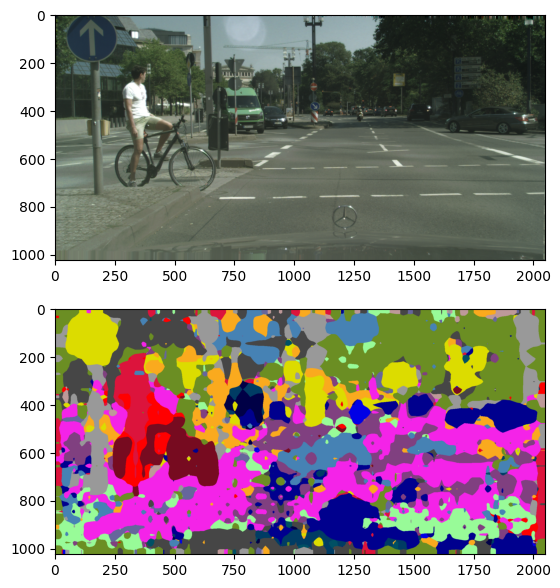

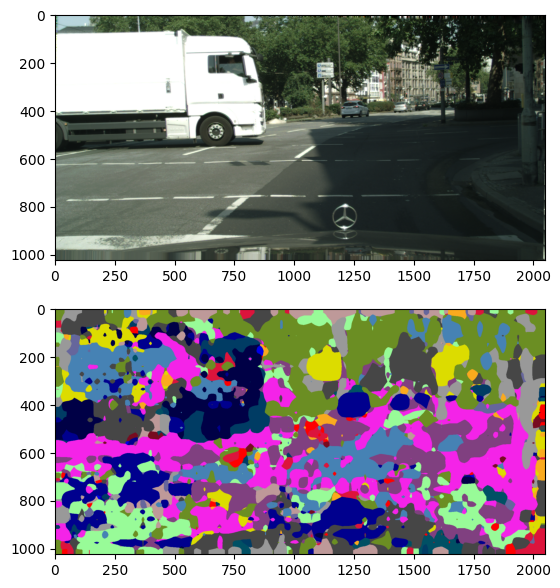

In [ ]:
for i in range(20):
  doSegmentation(i)